In [1]:
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
import collections

In [2]:
import tcri

/Users/ceglian/Codebase/tcri/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [20]:
adata = sc.read("/Users/ceglian/Analysis/yost/yost_v2.h5ad")
ct = []
for x in adata.obs["response"]:
    if "yes" in x.lower():
        ct.append("R")
    else:
        ct.append("NR")
adata.obs["response"] = ct

adata = adata[adata.obs["disease"] == "scc"]

ct = []
for x in adata.obs["cluster"]:
    if "CD8" not in x:
        x = "CD4_{}".format(x)
    if "naive" in x.lower():
        x = "Naive"
    ct.append(x)

adata.obs["phenotype"] = ct
keep = []
for x in set(adata.obs["phenotype"]):
    if "CD8" in x:
        keep.append(x)
adata = adata[adata.obs["phenotype"].isin(keep)].copy()
adata.X = csr_matrix(adata.X)
#sc.pp.normalize_total(adata)
#sc.pp.log1p(adata)

In [21]:
tcri.pp.add_tcr_key(adata,"trb")

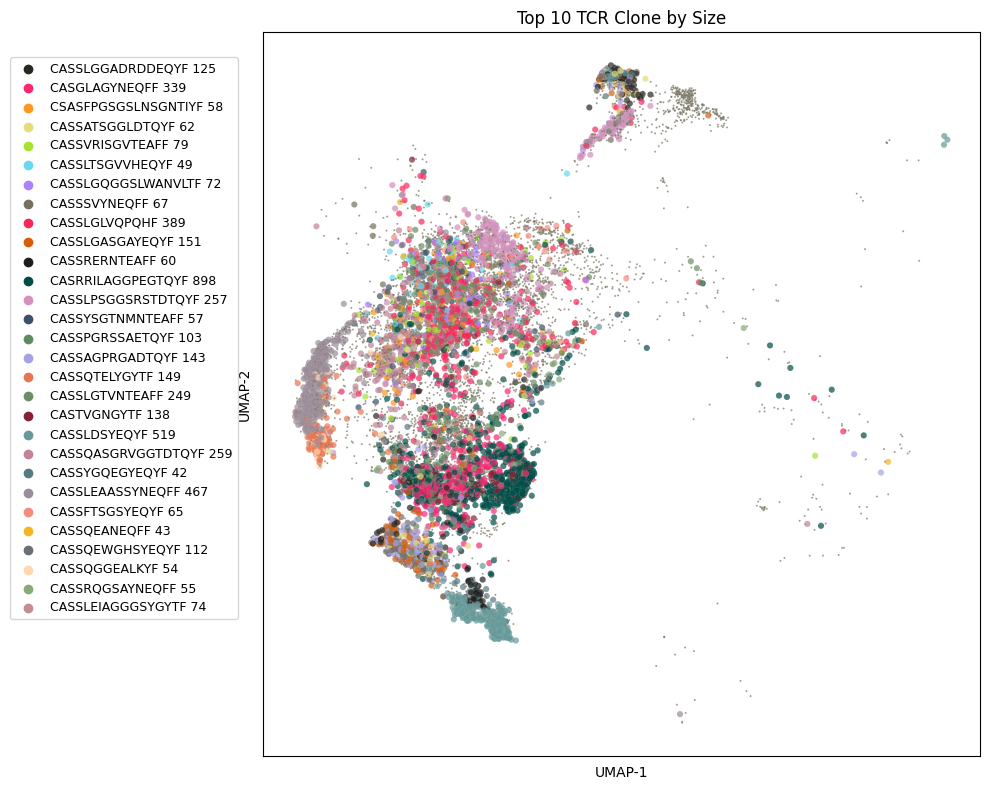

In [22]:
tcri.pl.tcr_umap(adata,top_n=30,size=20)

<AxesSubplot: xlabel='UMAP-1', ylabel='UMAP-2'>

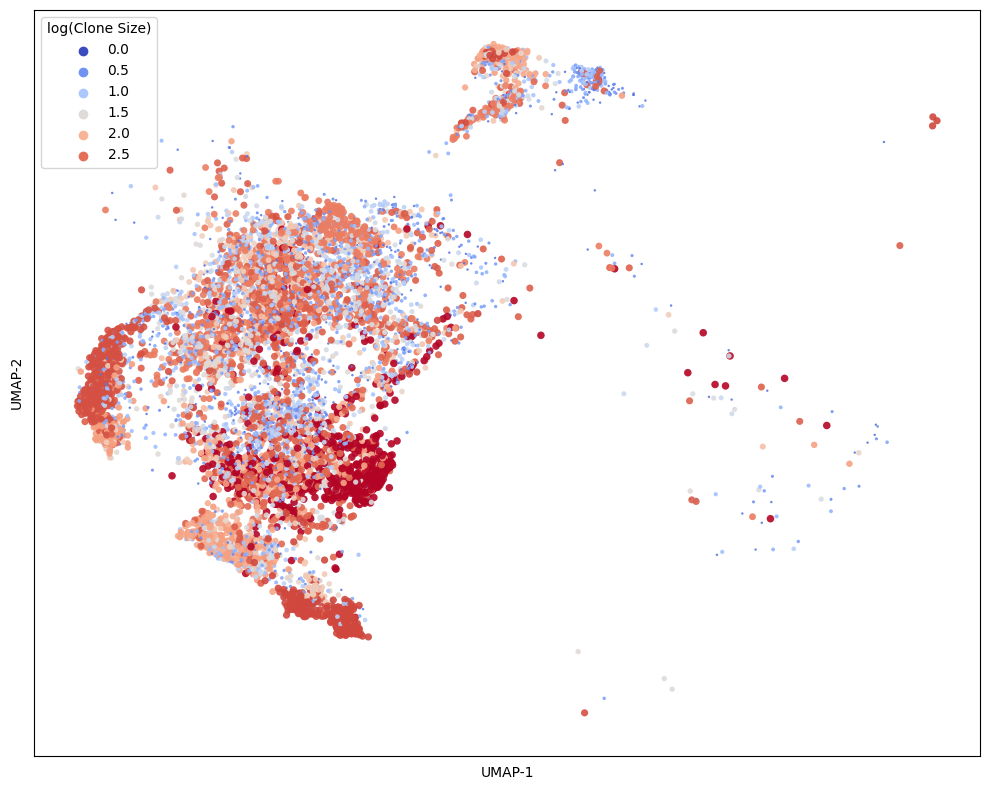

In [23]:
tcri.pl.clone_size(adata,scale=10,alpha=0.9)

In [24]:
tcri.pp.gene_entropy(adata)
# adata = adata[:,adata.var["entropy"] > 0.5]
# adata
tcri.pp.joint_distribution(adata)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 4950.74it/s]


In [25]:
tcri.tl.rank_genes_by_clonotypic_entropy(adata)

,Gene,Entropy
1999,NNAT,0.000000
1895,RXRG,0.000000
1414,ANKRD24,0.000000
1696,PLXDC2,0.000000
1658,VCAN,0.000000
...,...,...
979,GAPDH,0.955265
37,YBX1,0.956277
619,PPIA,0.958057
1025,HNRNPA1,0.960923


In [26]:
markers = dict()
markers['Naive'] = ["IL7R",'TCF7','LEF1','SELL']
markers['Cytotoxic'] = ["GNLY",'GZMB','PRF1','NKG7',"GZMA",'GZMH']
markers['Dysfunctional'] = ["TIGIT",'LAG3','HAVCR2',"TOX",'ENTPD1']
markers['Memory'] = ["GZMK",'CRTAM','ZNF683']
# markers = dict()
# sc.tl.rank_genes_groups(adata,"phenotype")
# for x in set(adata.obs["phenotype"]):
#     genes=sc.get.rank_genes_groups_df(adata,x)["names"].head(20)
#     markers[x] = genes.tolist()
# markers

In [27]:
nonresponder = adata[adata.obs["response"] == "NR"]
responder = adata[adata.obs["response"] == "R"]
tcri.pp.joint_distribution(nonresponder)
tcri.pp.joint_distribution(responder)

In [28]:
tcri.tl.marker_enrichment(adata,markers=markers).res2d

2023-10-24 12:07:07,684 [WARNING] Duplicated values found in preranked stats: 5.75% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Cytotoxic,0.761785,1.831699,0.005236,0.010707,0.0085,6/6,24.05%,NKG7;PRF1;GZMA;GZMH;GZMB;GNLY
1,prerank,Dysfunctional,0.672682,1.534851,0.032376,0.067706,0.102,5/5,32.90%,TIGIT;LAG3;ENTPD1;HAVCR2;TOX
2,prerank,Naive,0.594689,1.239087,0.189032,0.250249,0.484,4/4,40.65%,IL7R;TCF7;SELL;LEF1
3,prerank,Memory,0.547822,1.048481,0.386159,0.39852,0.7925,3/3,45.30%,GZMK;CRTAM;ZNF683


2023-10-24 12:07:11,145 [WARNING] Duplicated values found in preranked stats: 5.75% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-10-24 12:07:11,685 [WARNING] Duplicated values found in preranked stats: 5.75% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


<AxesSubplot: title={'center': 'Marker Enrichment by Lower Entropy Genes'}, xlabel='NES'>

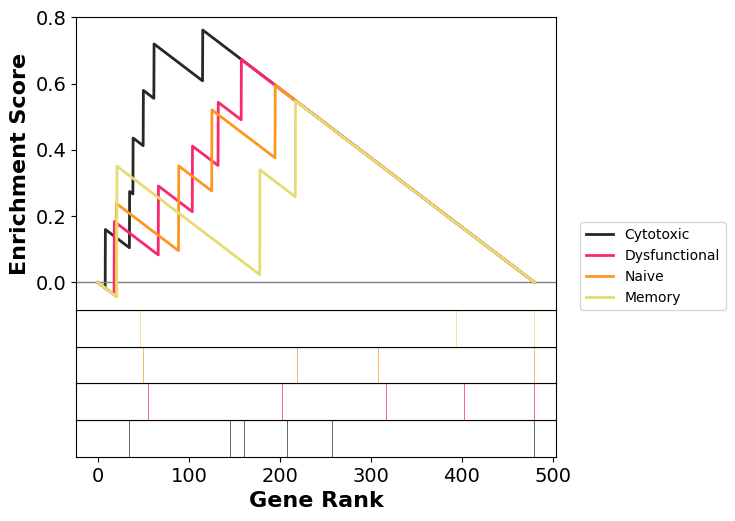

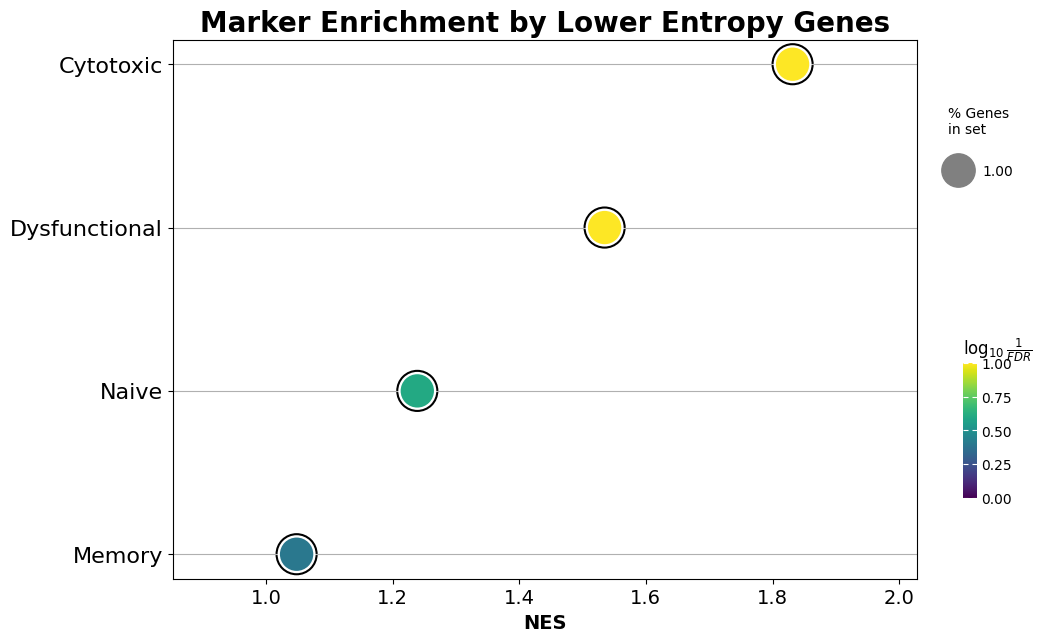

In [29]:
tcri.pl.marker_enrichment_score(adata,markers=markers)
tcri.pl.marker_enrichment_dotplot(adata,markers=markers)

In [30]:
df = tcri.tl.rank_genes_by_clonotypic_entropy(adata,probability=True)
# df[df["Gene"].isin(markers["Naive"])]
df.tail(30)

,Gene,Entropy
366,ANXA5,0.933548
1372,SNRPB,0.933849
914,HSPA8,0.935305
1129,PSME2,0.935709
216,ATP5G3,0.936576
1554,HMGN1,0.937556
1023,ATP5G2,0.937633
188,DUSP2,0.937765
446,SQSTM1,0.938322
620,H2AFV,0.938543


In [31]:
df[df["Gene"].isin(markers["Dysfunctional"])]

,Gene,Entropy
747,TOX,0.753686
432,HAVCR2,0.790995
952,ENTPD1,0.821595
981,LAG3,0.862572
291,TIGIT,0.916635


In [32]:
df[df["Gene"].isin(markers["Naive"])]

,Gene,Entropy
362,LEF1,0.712726
112,SELL,0.797884
418,TCF7,0.834087
387,IL7R,0.912959


2023-10-24 11:58:43,354 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-10-24 11:58:43,357 [WARNING] Duplicated values found in preranked stats: 0.96% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


(1794,)


2023-10-24 11:58:45,134 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-10-24 11:58:45,136 [WARNING] Duplicated values found in preranked stats: 0.96% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


(1794,)


2023-10-24 11:58:46,887 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-10-24 11:58:46,890 [WARNING] Duplicated values found in preranked stats: 0.96% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


(1794,)
(1794,)


,Gene,Entropy
362,IL7R,0.940790
101,SELL,0.865263
392,TCF7,0.838492
338,LEF1,0.818985


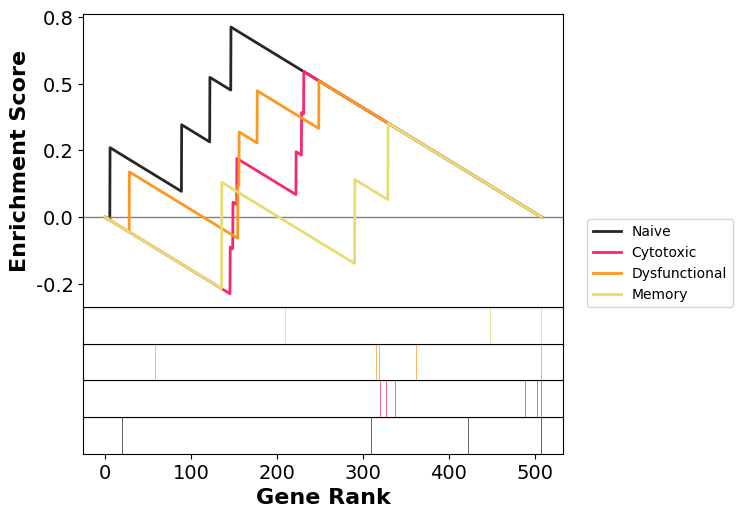

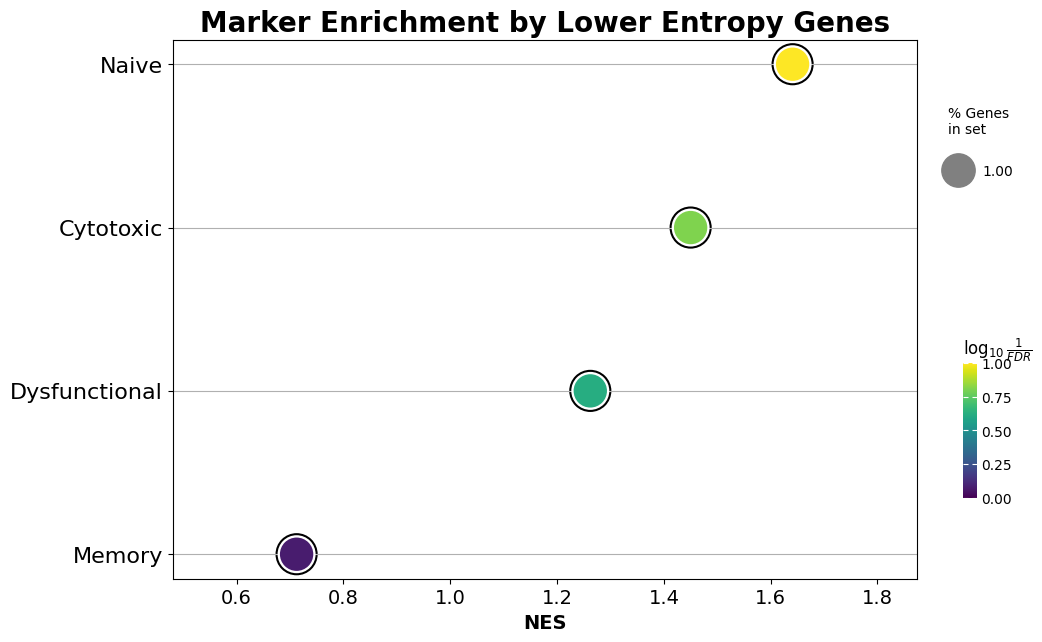

In [53]:
tcri.pl.marker_enrichment_score(responder,markers=markers)
tcri.pl.marker_enrichment_dotplot(responder,markers=markers)
tcri.tl.marker_enrichment(responder,markers=markers).res2d
df = tcri.tl.rank_genes_by_clonotypic_entropy(responder,probability=True)
df[df["Gene"].isin(markers["Naive"])]

2023-10-24 11:41:06,924 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-10-24 11:41:06,927 [WARNING] Duplicated values found in preranked stats: 1.27% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


(2000,)


2023-10-24 11:41:08,750 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-10-24 11:41:08,753 [WARNING] Duplicated values found in preranked stats: 1.27% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


(2000,)


2023-10-24 11:41:10,574 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-10-24 11:41:10,577 [WARNING] Duplicated values found in preranked stats: 1.27% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


(2000,)


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Naive,0.724349,1.614484,0.028359,0.105863,0.0775,4/4,27.71%,IL7R;SELL;TCF7;LEF1
1,prerank,Cytotoxic,0.593766,1.541933,0.047559,0.083417,0.12,6/6,40.80%,GZMA;NKG7;PRF1;GZMB;GZMH;GNLY
2,prerank,Dysfunctional,0.593973,1.457509,0.069057,0.094026,0.195,5/5,40.75%,TIGIT;LAG3;ENTPD1;TOX;HAVCR2
3,prerank,Memory,0.407653,0.829124,0.716968,0.695645,0.9405,3/3,59.30%,GZMK;CRTAM;ZNF683


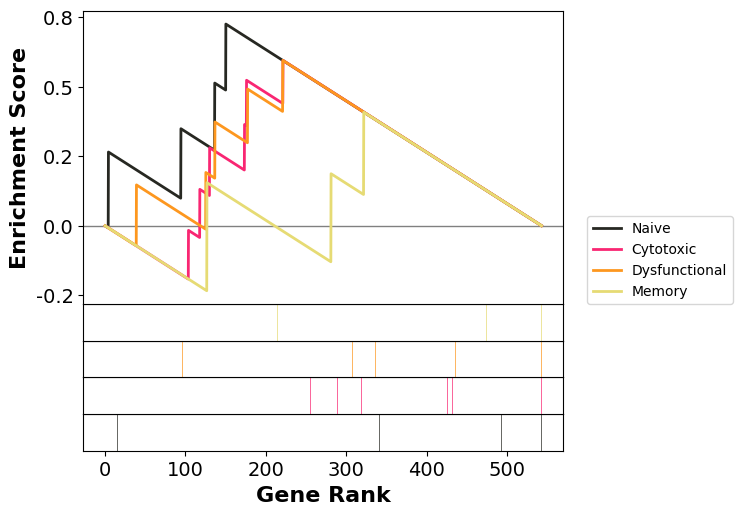

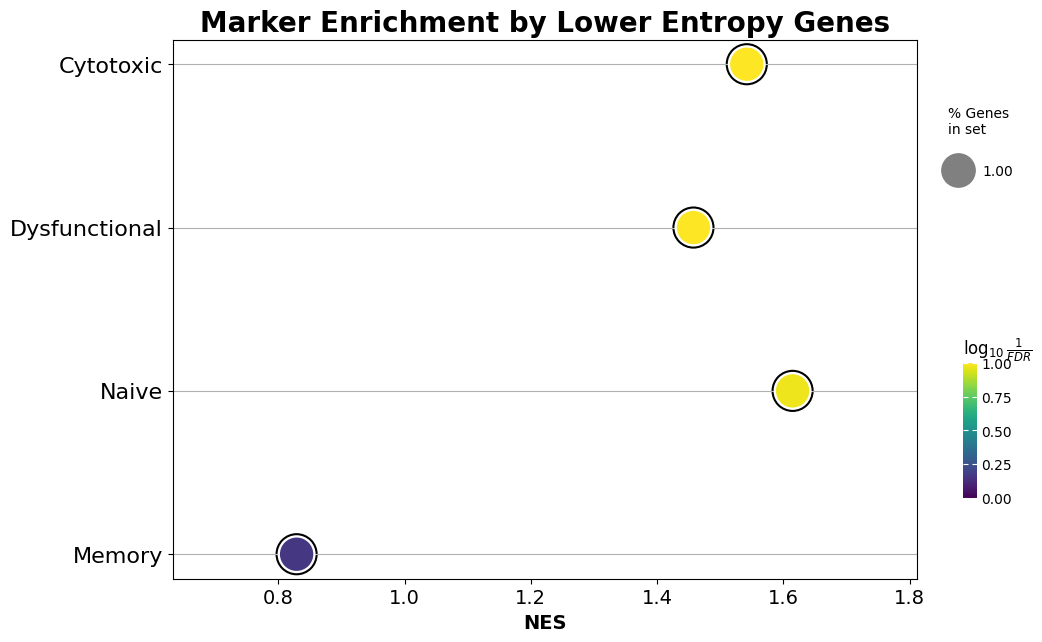

In [14]:
tcri.pl.marker_enrichment_score(nonresponder,markers=markers)
tcri.pl.marker_enrichment_dotplot(nonresponder,markers=markers)
tcri.tl.marker_enrichment(nonresponder,markers=markers).res2d

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Dysfunctional_NR v.s. Dysfunctional_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.800e+01
Cytotoxic_NR v.s. Cytotoxic_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.200e+01
Memory_NR v.s. Memory_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00
Naive_NR v.s. Naive_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.200e+01


,Gene,Entropy
1990,DOK5,205.0
1991,STAG3,200.0
1992,SOX4,197.0
1993,FBXO5,195.0
1994,IL23R,194.0
1995,KNSTRN,194.0
1996,ATAD2,178.0
1997,CEBPD,178.0
1998,MGST2,168.0
1999,C1QB,163.0


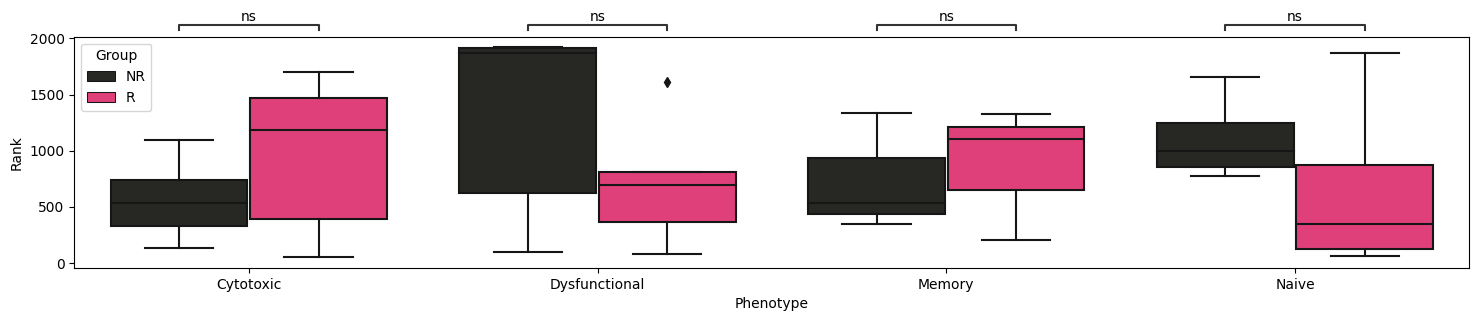

In [45]:
tcri.pp.joint_distribution(adata)
tcri.pl.rank_markers(adata,markers=markers,groupby="response",figsize=(18,3))
tcri.tl.rank_genes_by_clonotypic_entropy(adata).tail(10)

<AxesSubplot: xlabel='Phenotype', ylabel='Entropy'>

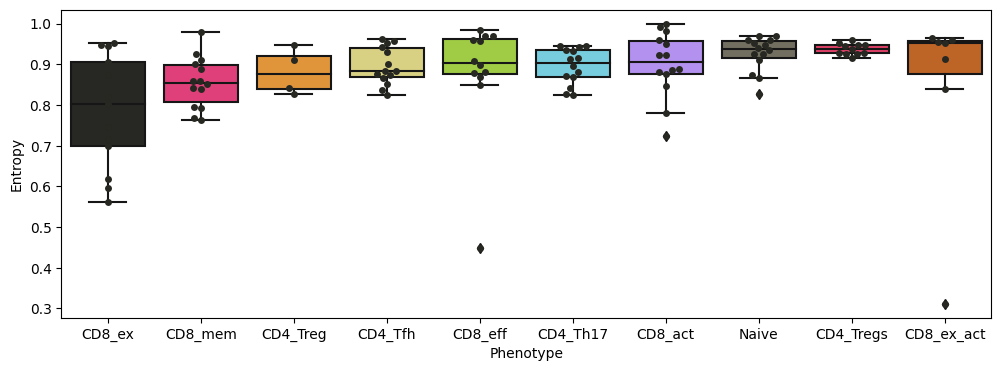

In [46]:
tcri.pl.transcriptional_entropy(adata, phenotype_key="phenotype", groupby="patient", figsize=(12,4))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CD8_ex_act_NR v.s. CD8_ex_act_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.714e-01 U_stat=0.000e+00
CD4_Tregs_NR v.s. CD4_Tregs_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.300e+01
CD8_mem_NR v.s. CD8_mem_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.700e+01
CD8_ex_NR v.s. CD8_ex_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.200e+01
CD4_Treg_NR v.s. CD4_Treg_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+00
CD8_eff_NR v.s. CD8_eff_R: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.000e+00
CD4_Th17_NR v.s. CD4_Th17_R: Mann-Whitney-Wilcoxon test two-sided with Bonfe

<AxesSubplot: xlabel='Phenotype', ylabel='Entropy'>

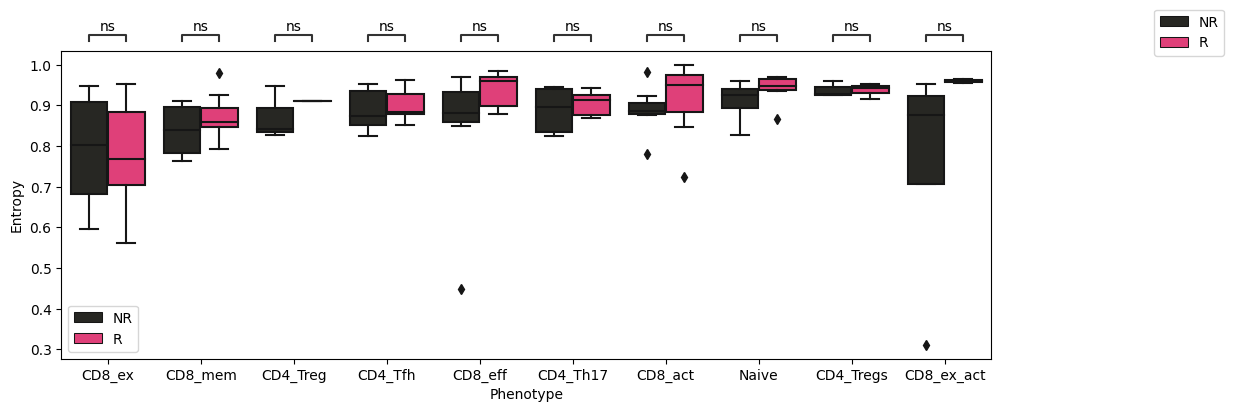

In [47]:
tcri.pl.transcriptional_entropy(adata, phenotype_key="phenotype", groupby="patient", splitby="response", figsize=(12,4))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CD4_Tregs_pre v.s. CD4_Tregs_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.000e+00
Naive_pre v.s. Naive_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.400e+01
CD8_ex_pre v.s. CD8_ex_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.100e+01
CD8_ex_act_pre v.s. CD8_ex_act_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
CD4_Th17_pre v.s. CD4_Th17_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.000e+01
CD8_eff_pre v.s. CD8_eff_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.400e+01
CD4_Tfh_pre v.s. CD4_Tfh_post: Mann-Whitney-Wilcoxon tes

<AxesSubplot: xlabel='Phenotype', ylabel='Entropy'>

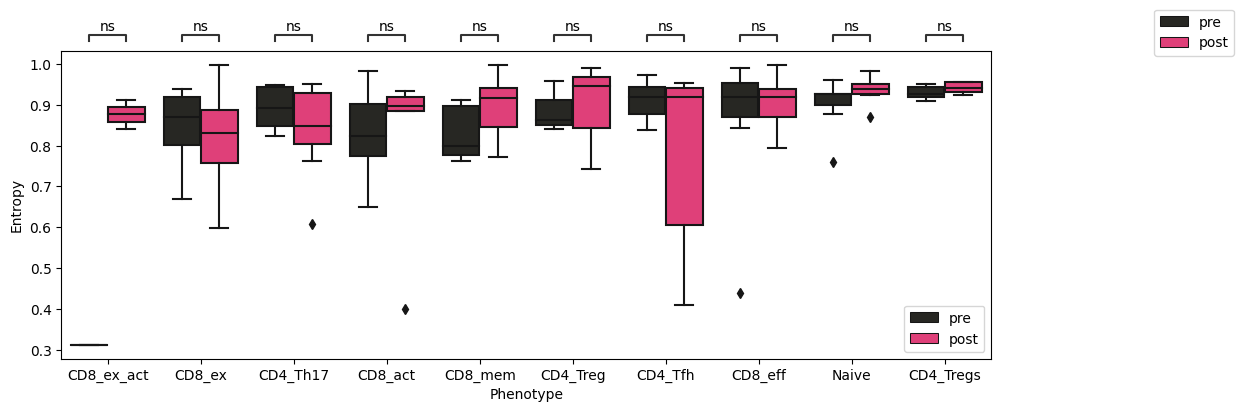

In [48]:

tcri.pl.transcriptional_entropy(nonresponder, phenotype_key="phenotype", groupby="patient", splitby="treatment")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CD8_ex_act_pre v.s. CD8_ex_act_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
Naive_pre v.s. Naive_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.000e+01
CD8_mem_pre v.s. CD8_mem_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.000e+01
CD8_ex_pre v.s. CD8_ex_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.000e+00
CD8_act_pre v.s. CD8_act_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.225e-01 U_stat=2.500e+01
CD8_eff_pre v.s. CD8_eff_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.000e+00
CD4_Th17_pre v.s. CD4_Th17_post: Mann-Whitney-Wilcoxon test tw

<AxesSubplot: xlabel='Phenotype', ylabel='Entropy'>

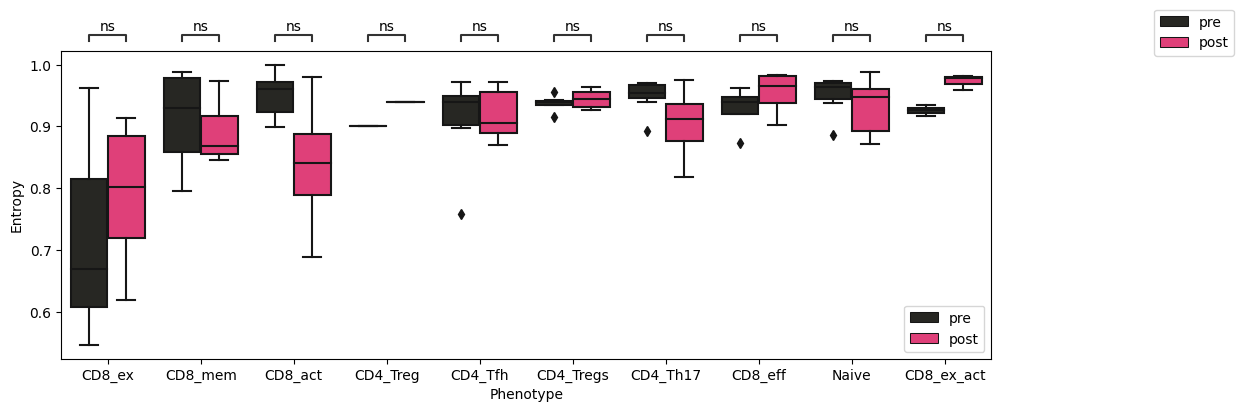

In [49]:
tcri.pl.transcriptional_entropy(responder, phenotype_key="phenotype", groupby="patient", splitby="treatment")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pre v.s. post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.015e-01 U_stat=2.300e+01


<AxesSubplot: xlabel='treatment', ylabel='Entropy'>

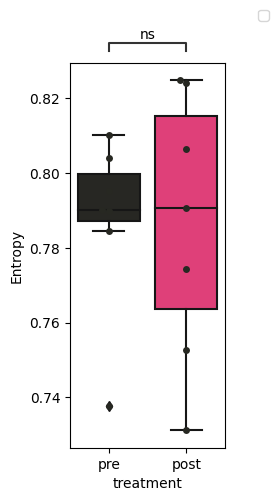

In [50]:
tcri.pl.clonotypic_entropy(responder,groupby="patient",splitby="treatment",figsize=(2,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

post v.s. pre: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.104e-01 U_stat=2.100e+01


<AxesSubplot: xlabel='treatment', ylabel='Entropy'>

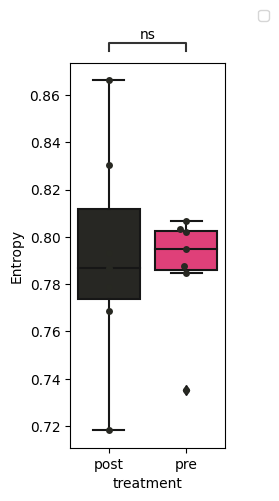

In [51]:
tcri.pl.clonotypic_entropy(nonresponder,groupby="patient",splitby="treatment",figsize=(2,5))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

R v.s. NR: t-test independent samples with Bonferroni correction, P_val=4.644e-02 stat=-2.220e+00


<AxesSubplot: xlabel='Label', ylabel='Flux L1'>

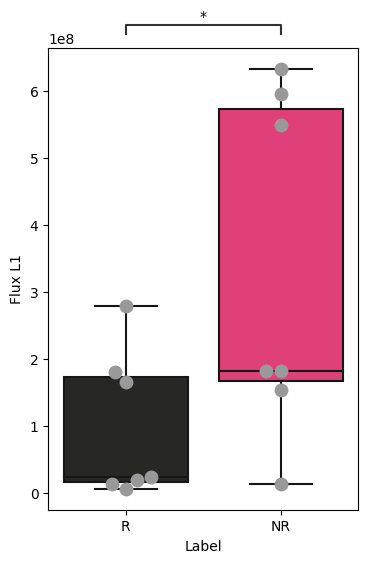

In [52]:
tcri.pl.flux(adata, "treatment", from_this="pre", to_that="post", groupby="patient", splitby="response", figsize=(4,6))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NR v.s. R: t-test independent samples with Bonferroni correction, P_val=nan stat=nan


<AxesSubplot: xlabel='Label', ylabel='Flux dkl'>

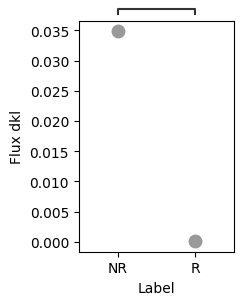

In [53]:
tcri.pl.flux(adata, "treatment", from_this="pre", to_that="post", method="dkl",
             groupby="patient", splitby="response", figsize=(2,3))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

R v.s. NR: t-test independent samples with Bonferroni correction, P_val=3.428e-02 stat=2.388e+00


<AxesSubplot: xlabel='Label', ylabel='MI'>

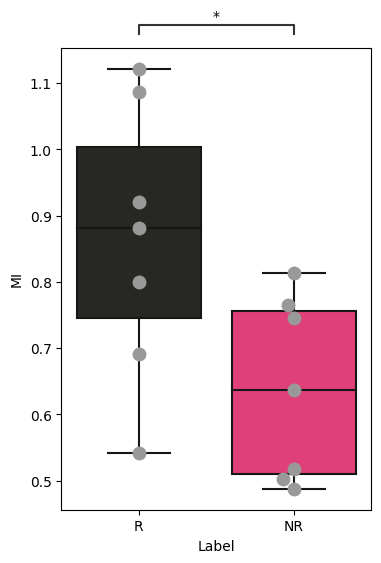

In [54]:
tcri.pl.mutual_information(adata,"patient","response",order=["R",'NR'], figsize=(4,6))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pre v.s. post: t-test independent samples with Bonferroni correction, P_val=7.281e-01 stat=3.514e-01


<AxesSubplot: xlabel='Label', ylabel='MI'>

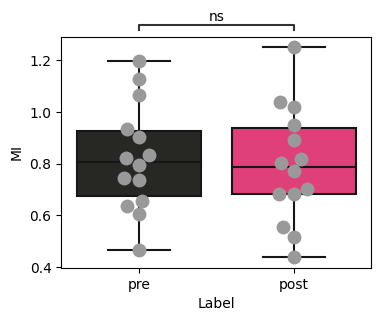

In [55]:
tcri.pl.mutual_information(adata,"patient","treatment",order=["pre","post"], figsize=(4,3))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pre v.s. post: t-test independent samples with Bonferroni correction, P_val=3.688e-01 stat=9.338e-01


<AxesSubplot: xlabel='Label', ylabel='MI'>

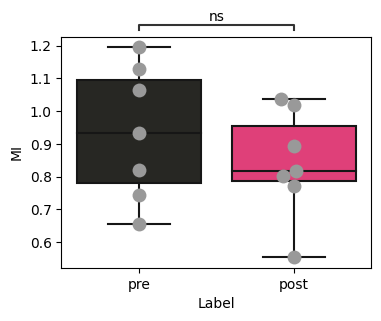

In [56]:
tcri.pl.mutual_information(responder,"patient","treatment", figsize=(4,3),order=["pre","post"])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pre v.s. post: t-test independent samples with Bonferroni correction, P_val=7.715e-01 stat=-2.970e-01


<AxesSubplot: xlabel='Label', ylabel='MI'>

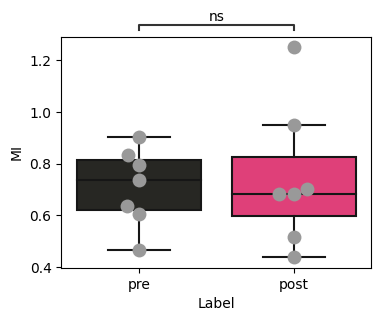

In [57]:
tcri.pl.mutual_information(nonresponder,"patient","treatment",order=["pre","post"], figsize=(4,3))